In [47]:
import numpy as np
from numpy.linalg import inv
from math import sqrt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from my_linear_regression import MyLinearRegression  # Assuming your class is in a separate file
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
# class MyLinearRegression(object):
#     """    Description:        My personnal linear regression class to fit like a boss.   
#     """
#     def __init__(self, theta):
#         """     Description:
#         generator of the class, initialize self.
#         Args:
#             theta: has to be a list or a numpy array,
#             it is a vector ofdimension (number of features + 1, 1).
#             Raises:
#            This method should noot raise any Exception.        
#         """
#         if (not isinstance(theta, list) and not isinstance(theta, np.ndarray)
#         and theta.shape[1] != 1):
#             print("error")
#         if isinstance(theta, list):
#             theta = np.array(theta).reshape(-1,1)
#         self.theta = theta
#     def setTheta(self, theta):
#         if (not isinstance(theta, list) and not isinstance(theta, np.ndarray)
#         and theta.shape[1] != 1):
#             print("error")
#         if isinstance(theta, list):
#             theta = np.array(theta)
#         self.theta = theta	
#     def	concat(self, X):
#         M = X.shape[0]
#         ones = np.ones((M,1))
#         X = np.concatenate((ones,X),axis=1)
#         return X
#     def predict_(self, X):
#         X = self.concat(X)
#         return X.dot(self.theta)
#     def cost_elem_(self, X, Y):
#         M = Y.shape[0]
#         pred = X.dot(self.theta)
#         return np.power((pred - Y),2,dtype=float) * (0.5 / M)
#     def cost_(self, X, Y):
#         return float(sum(self.cost_elem_(X, Y)))
#     def grad_(self, error, X):
#         X = self.concat(X)
#         return (X.transpose()).dot(error)
#     def mse_(self,X, Y):
#         error = X.dot(self.theta) - Y
#         M = float(Y.shape[0])
#         return float(sum(np.power(error,2,dtype=float)) / M)
#     def fit_(self, X, Y, alpha=1.6e-4,n_cycle=1000000):
#         M = Y.shape[0]
#         X = self.concat(X)
#         for i in range(int(n_cycle)):
#             error = X.dot(self.theta) - Y
#             grad = (X.transpose()).dot(error)
#             self.theta = self.theta - alpha * (1. / M ) * 0.5 * grad
#             if i % 1000 == 0:
#                 print("cost: {}".format(self.mse_(X, Y)),end='\r')
#         return self.theta
#     def normalequation_(self, X, Y):
#         X = self.concat(X)
#         X_t = X.transpose()
#         xx_t = X_t.dot(X).astype(np.int)
#         X_ty = X_t.dot(Y)
#         xx_ti = inv(xx_t)
#         print(self.theta.shape)
#         self.theta = (xx_ti.transpose()).dot(X_ty)
#         print(self.theta.shape)
#         return self.theta
#     def rmse_(self, X, Y):
#         return float(sqrt(self.mse_(X,Y)))
#     def r2score_(self, X, Y):
#         Yp = self.predict_(X)
#         meanY = np.mean(Y)
#         SStot = np.power(Y - meanY, 2,dtype=float)
#         SSres = np.power(Y - Yp, 2,dtype=float)
#         return float(1 - float(SSres / SStot))

In [49]:
class MyLinearRegression(object):
    """    Description:        My personnal linear regression class to fit like a boss.   
    """
    def __init__(self, theta):
        """     Description:
        generator of the class, initialize self.
        Args:
            theta: has to be a list or a numpy array,
            it is a vector ofdimension (number of features + 1, 1).
            Raises:
           This method should noot raise any Exception.        
        """
        if (not isinstance(theta, list) and not isinstance(theta, np.ndarray)
        and theta.shape[1] != 1):
            print("error")
        if isinstance(theta, list):
            theta = np.array(theta).reshape(-1,1)
        self.theta = theta
    def setTheta(self, theta):
        if (not isinstance(theta, list) and not isinstance(theta, np.ndarray)
        and theta.shape[1] != 1):
            print("error")
        if isinstance(theta, list):
            theta = np.array(theta)
        self.theta = theta	
    def	concat(self, X):
        M = X.shape[0]
        ones = np.ones((M,1))
        X = np.concatenate((ones,X),axis=1)
        return X
    def predict_(self, X):
        X = self.concat(X)
        return X.dot(self.theta)
    def cost_elem_(self, X, Y):
        M = Y.shape[0]
        pred = X.dot(self.theta)
        return np.power((pred - Y),2,dtype=float) * (0.5 / M)
    def cost_(self, X, Y):
        return float(sum(self.cost_elem_(X, Y)))
    def grad_(self, error, X):
        X = self.concat(X)
        return (X.transpose()).dot(error)
    def mse_(self,X, Y):
        error = X.dot(self.theta) - Y
        M = float(Y.shape[0])
        return float(sum(np.power(error,2,dtype=float)) / M)
    def fit_(self, X, Y, alpha=1.6e-4, n_cycle=1000000):
        """
        Train the model using gradient descent.
        Parameters:
            X: ndarray, shape (m, n)
            Input features.
            Y: ndarray, shape (m, 1)
            Target values.
            alpha: float
            Learning rate.
            n_cycle: int
            Number of iterations.
        Returns:
            self.theta: ndarray, shape (n+1, 1)
            Updated model parameters.
        """
        m = Y.shape[0]  # Number of samples
        X_augmented = self.concat(X)  # Add bias term (column of ones)
        
        for i in range(n_cycle):
            # Compute predictions and error
            predictions = X_augmented.dot(self.theta)  # Shape: (m, 1)
            error = predictions - Y  # Shape: (m, 1)
            
            # Compute the gradient
            gradient = X_augmented.T.dot(error) / m  # Shape: (n+1, 1)
            
            # Update parameters
            self.theta -= alpha * gradient  # Gradient descent step
            
            # Optionally print the cost every 1000 iterations
            if i % 1000 == 0:
                cost = mean_squared_error(predictions, Y)  # Compute cost
                print(f"Iteration {i}: Cost {cost:.6f}", end='\r')

        return self.theta
    def normalequation_(self, X, Y):
        X = self.concat(X)
        X_t = X.transpose()
        xx_t = X_t.dot(X).astype(np.int)
        X_ty = X_t.dot(Y)
        xx_ti = inv(xx_t)
        print(self.theta.shape)
        self.theta = (xx_ti.transpose()).dot(X_ty)
        print(self.theta.shape)
        return self.theta
    def rmse_(self, X, Y):
        return float(sqrt(self.mse_(X,Y)))
    def r2score_(self, X, Y):
        Yp = self.predict_(X)
        meanY = np.mean(Y)
        SStot = np.power(Y - meanY, 2,dtype=float)
        SSres = np.power(Y - Yp, 2,dtype=float)
        return float(1 - float(SSres / SStot))

In [50]:
# Load the data
data = pd.read_csv('data.csv')

# Extract features (mileage) and target (price)
x = data['km'].values.reshape(-1, 1)
y = data['price'].values.reshape(-1, 1)

# Normalize the data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

x_scaled = scaler_x.fit_transform(x)
y_scaled = scaler_y.fit_transform(y)

# Initialize theta with small random values
theta = np.random.randn(2, 1) * np.sqrt(2. / x_scaled.shape[0])
model = MyLinearRegression(theta)

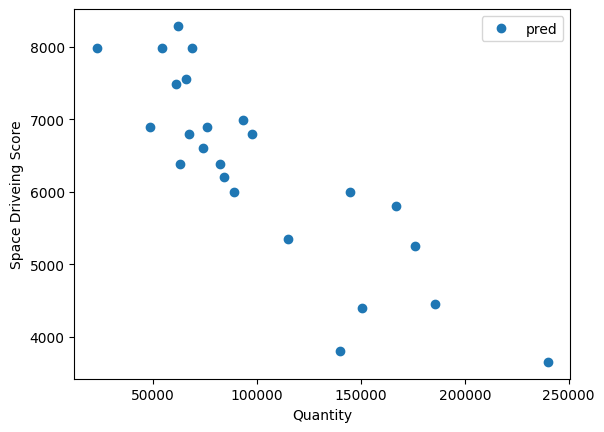

In [51]:
plot1 = plt.plot(x, y, marker='o',linestyle='None')
# plot2 = plt.plot(x, y)
plt.xlabel('Quantity')
plt.ylabel('Space Driveing Score')
plt.legend({'pred':'true','true':'false'})
plt.show()

In [52]:
# Train the model and store theta values at periodic intervals
model.fit_(x_scaled, y_scaled, alpha=1.6e-4, n_cycle=100000)

# Save the trained parameters
np.save('theta.npy', model.theta)

# Save the scalers for the prediction program
with open('scalers.pkl', 'wb') as f:
    pickle.dump((scaler_x, scaler_y), f)

# Evaluate the model
y_pred_scaled = model.predict_(x_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_scaled)

In [53]:
x.shape, y.shape, y_pred.shape

((24, 1), (24, 1), (24, 1))

In [54]:
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 769457.95
Root Mean Squared Error (RMSE): 877.19
R² Score: 0.54


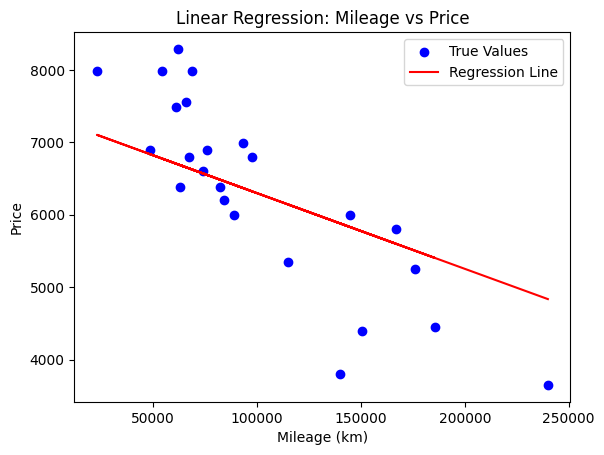

In [55]:
# Visualization
plt.scatter(x, y, label='True Values', color='blue')
plt.plot(x, y_pred, label='Regression Line', color='red')
plt.xlabel('Mileage (km)')
plt.ylabel('Price')
plt.legend()
plt.title('Linear Regression: Mileage vs Price')
plt.show()